Back to the main [Index](../index.ipynb)

In [1]:
# Use %matplotlib if you are running in the ipython shell.
%matplotlib notebook

import abipy.abilab as abilab
from abipy.lessons.lesson_ecut_convergence import Lesson

lesson = Lesson()
lesson

Basis set convergence study and more info on flows, works, and tasks
====================================================================

Background
----------

This lesson focuses on the convergence study on the completeness of the plane wave (PW) basis set.
Plane waves are inherently well suited to capture the periodic nature of crystalline solids.
In addition, a PW basis set has the advantage that it introduces only one convergence parameter,
the kinetic energy cutoff (ecut).

The sharp features of the wavefunctions near the nucleus are however problematic for PWs.
Describing these features would require very high energy cutoff energies.
For this reason PW codes use pseudo-potentials in order to facilitate the convergence of the results.
A pseudopotential replaces the singular coulomb potential of the nucleus and the
core electrons by something smoother inside the so-called pseudization region.
The pseudopotential connects smoothly to the real all-electron potential outside the pseudization region.

Note that different pseudo potentials usually require a different cutoff energy to be converged.
In general norm-conserving pseudos require a larger cut-off than ultra-soft pseudos
or Projector Augmented Wave 'pseudos'.
Moreover two pseudos of the same type for the same element may require different  cutoff energies as well.
Pseudos with small pseudization radius usually require larger cutoffs than pseudos
with large pseudization radius.

The related abinit variables
----------------------------

    * ecut        (cutoff energy)
    * pawecutdg   (additional variable for the double-grid used in PAW)
    * ecutsm      (smoothing of the kinetic energy)


More info on the input variables and their use can be obtained using:

    .. code-block:: python

        print(lesson.docvar("inputvariable"))

Description of the lesson
-------------------------
This lesson contains a factory function for a convergence study with respect to ecut.

Executing the lesson
--------------------

Start this lesson by importing it:

    .. code-block:: python

        from abipy.lessons.lesson_ecut_convergence import Lesson
        lesson = Lesson()

As usual, you can reread this text using the command:

    .. code-block:: python

        lesson

To build the flow:

    .. code-block:: python

        flow = lesson.make_ecut_flow()

To print the input files

    .. code-block:: python

        flow.show_inputs()

to show the status of a flow:

    .. code-block:: python

        flow.show_status()

There are many more properties and methods of the flow than may also come in handy.
By typing [tab] in ipython after the period, you will be presented
with all the options. Feel free to experiment a bit at this point.
In the ipython shell, one can get the description of the object by
adding a question mark at the end of the statement:

    .. code-block:: python

        flow.show_status?

Start the flow with the scheduler and wait for completion.

    .. code-block:: python

        flow.make_scheduler().start()

To analyze the results.

    .. code-block:: python

        lesson.analyze(flow)

Exercises
---------

Try to run the convergence study for Al.

Get a copy of the python script used in this lesson like before and look at the `analyze` method.
Use the code in `analyze` to build your Pandas dataframe and use its method to produce convergence plots:

Next
----

A logical next lesson would be lesson_relaxation

Examples
--------

In [2]:
flow = lesson.make_ecut_flow()

In [3]:
flow.show_inputs()



<ScfTask, node_id=84336, workdir=flow_Si_ecut_convergence/w0/t0>
############################################################################################
#                                      SECTION: varbas                                      
############################################################################################
# <TOLerance on the potential V(r) ReSidual>
 tolvrs 1e-09
# <KPoinTs OPTion>
 kptopt 1
# <SHIFT for K points>
 shiftk 0 0 0
# <Number of Grid points for K PoinTs generation>
 ngkpt 4 4 4
# <Number of SHIFTs for K point grids>
 nshiftk 1
# <Energy CUToff>
 ecut 10
############################################################################################
#                                         STRUCTURE                                         
############################################################################################
# <CELL lattice vector scaling>
 acell    1.0    1.0    1.0
# <vectors (X) of atom positions in REDuced coordi

##### This flow contains 1 workflow with 5 ScfTask

<IPython.core.display.Javascript object>


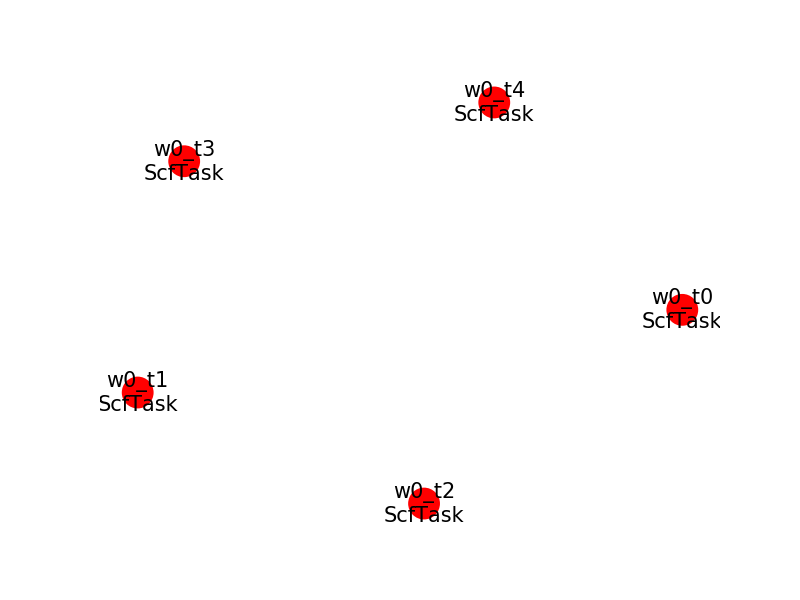

In [4]:
flow.plot_networkx()

##### There's no dependency among the tasks --> the scheduler will submit all 5 tasks immediately

In [5]:
%%capture
flow.make_scheduler().start()

0

In [6]:
flow.show_status(verbose=1)


Work #0: <Work, node_id=84335, workdir=flow_Si_ecut_convergence/w0>, Finalized=True
+--------+-----------+----------------+--------------+------------+---------+-----------------+----------+-----------+
| Task   | Status    | Queue          | MPI|Omp|Gb   | Warn|Com   | Class   | Sub|Rest|Corr   | Time     |   Node_ID |
+========+===========+================+==============+============+=========+=================+==========+===========+
| w0_t0  | Completed | 2570@localhost | 2|  1|2.0    | 2|  0      | ScfTask | (1, 0, 0)       | 0:00:04R |     84336 |
+--------+-----------+----------------+--------------+------------+---------+-----------------+----------+-----------+
| w0_t1  | Completed | 2579@localhost | 2|  1|2.0    | 2|  0      | ScfTask | (1, 0, 0)       | 0:00:04R |     84337 |
+--------+-----------+----------------+--------------+------------+---------+-----------------+----------+-----------+
| w0_t2  | Completed | 2588@localhost | 2|  1|2.0    | 2|  0      | ScfTask | (1, 

To analyze the flow:

<IPython.core.display.Javascript object>


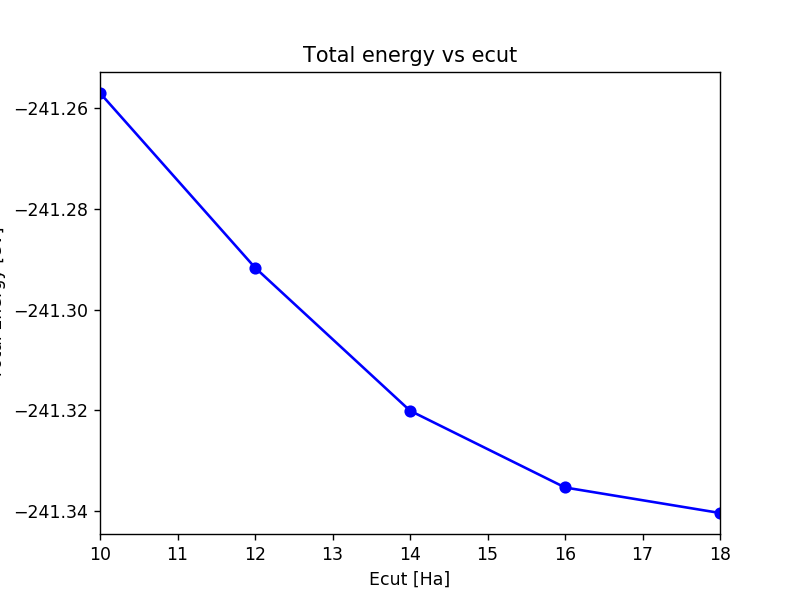

In [7]:
lesson.analyze(flow)

The code that produces the figure above:

In [8]:
from abipy.tools.notebooks import print_source
print_source(lesson.analyze)

To inspect the first task

<IPython.core.display.Javascript object>


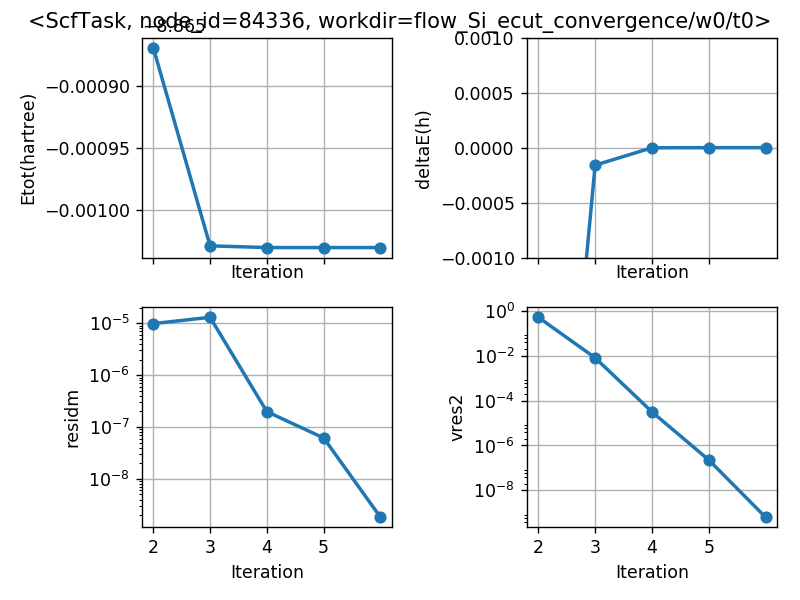

In [9]:
task = flow[0][0]
# Use size_kwargs to change the default width, height:
fig = task.inspect()

To plot the electron bands from the GSR file

<IPython.core.display.Javascript object>


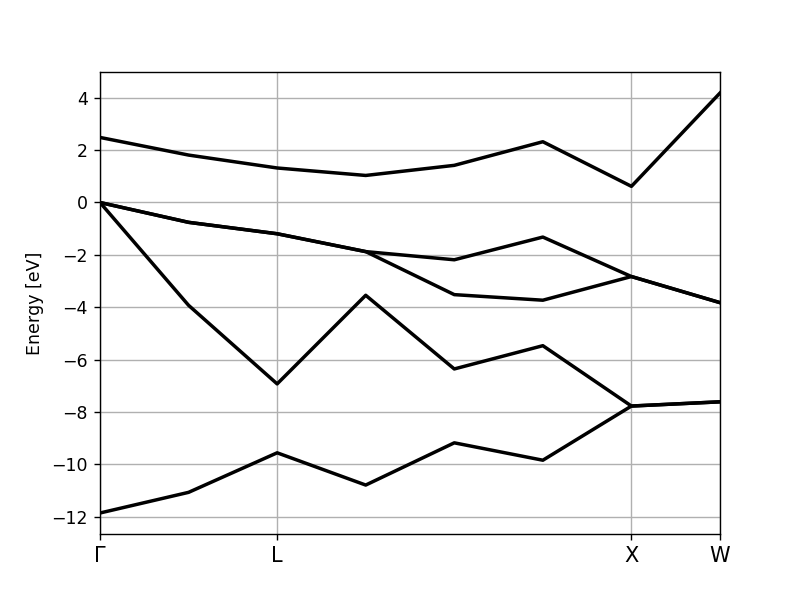

/Users/gmatteo/git_repos/pymatgen/pymatgen/symmetry/bandstructure.py:61: UserWarning: The input structure does not match the expected standard primitive! The path can be incorrect. Use at your own risk.
  warnings.warn("The input structure does not match the expected standard primitive! "


In [10]:
with task.open_gsr() as gsr:
    gsr.plot_ebands()

The list of pseudos used by the Task

In [11]:
for p in task.pseudos:
    print(p)

<NcAbinitPseudo: 14si.pspnc>
  summary: Troullier-Martins psp for element  Si        Thu Oct 27 17:31:21 EDT 1994
  number of valence electrons: 4.0
  maximum angular momentum: d
  angular momentum for local part: d
  XC correlation: LDA_XC_TETER93
  supports spin-orbit: False
  radius for non-linear core correction: 1.80626423935
  hint for normal accuracy: <pymatgen.io.abinit.pseudos.Hint object at 0x1106ae910>


To create a Pandas table with the GSR results of the 5 ScfTask

In [12]:
with abilab.abirobot(flow, "GSR") as robot:
    data = robot.get_dataframe()
data

,energy,pressure,max_force,ecut,pawecutdg,tsmear,nkpt,nsppol,nspinor,nspden,...,angle0,angle1,angle2,a,b,c,volume,abispg_num,spglib_symb,spglib_num
w0_t0,-241.256971,-3.384305,5.944821e-27,10.0,-1.0,0.01,8,1,1,1,...,60.0,60.0,60.0,3.866975,3.866975,3.866975,40.888292,227,Fd-3m,227
w0_t1,-241.291651,-3.483923,5.483412e-27,12.0,-1.0,0.01,8,1,1,1,...,60.0,60.0,60.0,3.866975,3.866975,3.866975,40.888292,227,Fd-3m,227
w0_t2,-241.320069,-3.363182,2.572821e-27,14.0,-1.0,0.01,8,1,1,1,...,60.0,60.0,60.0,3.866975,3.866975,3.866975,40.888292,227,Fd-3m,227
w0_t3,-241.335321,-3.142019,6.167133e-27,16.0,-1.0,0.01,8,1,1,1,...,60.0,60.0,60.0,3.866975,3.866975,3.866975,40.888292,227,Fd-3m,227
w0_t4,-241.340392,-2.999776,3.464778e-27,18.0,-1.0,0.01,8,1,1,1,...,60.0,60.0,60.0,3.866975,3.866975,3.866975,40.888292,227,Fd-3m,227


To plot `energy` and `pressure` as function of `ecut`:

<IPython.core.display.Javascript object>


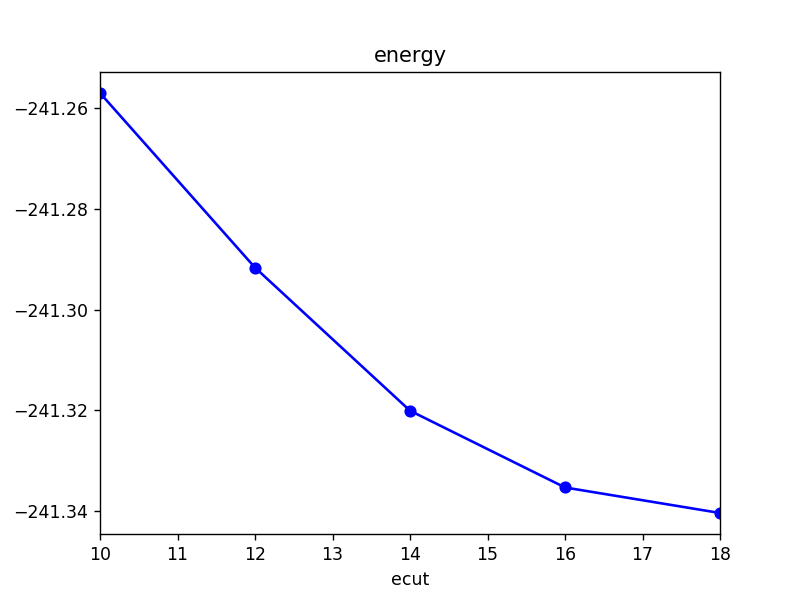

<IPython.core.display.Javascript object>


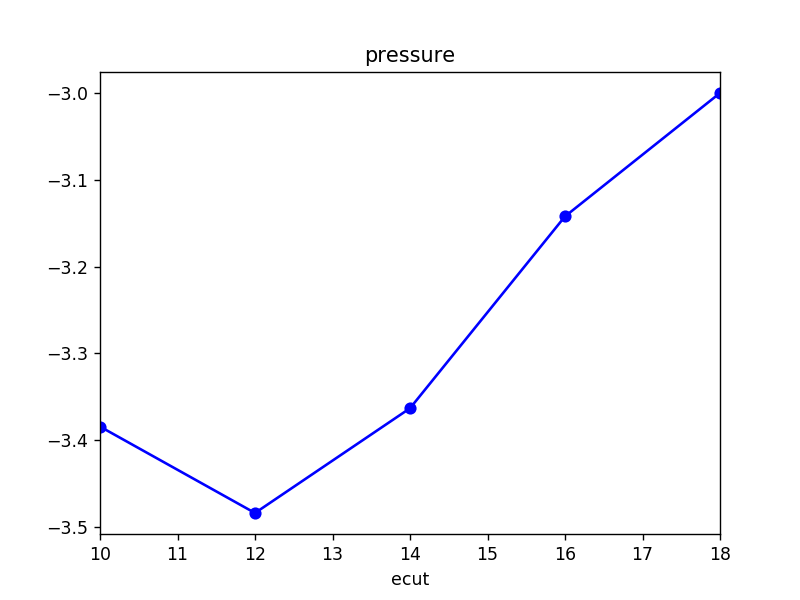

In [13]:
for ykey in ["energy", "pressure"]:
    data.plot("ecut", ykey, title=ykey, legend=False, style="b-o")